In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import progressbar
import random
import seaborn as sns
import time

import Simulation

from IPython.display import clear_output
from Diffusion.Model       import *
from Algorithms.Heuristics import *
from Algorithms.Baselines  import *
from Algorithms.Proposed   import *

sns.set_style("darkgrid")

In [2]:
algorithms = [random_solution, degree_solution]
n_trials = 50
seed_sizes = list(range(0, 100+1, 10))
seed_sizes[0] = 1
time_horizon = 100
topo_code = "eu-core" #"amazon"

columns = ["trial", "opinion", "activated", "algorithm", "seed_size", "alg-runtime"]
data = {col: [] for col in columns}
random_seed = 16785407

uniform = random.random

# Initial Observations & To-Do's
* First, there is ***something*** wrong with the BIC diffusion model. This is obvious because (using the random solution) when $k=1000$ we get the bizarre case where $\sum_{v\in V}O_v^T < 1000$. This should *not* be happening. **Investigate it.**
* Second, the TIM+ algorithm is not fully implemented. We need to get the set of nodes that have been *visited*. This should be doable with the killed set and active set, but investigate it with the BIC diffusion model.

In [8]:
opd_start = time.time()
df_opd = Simulation.run(
    topo_code=topo_code, 
    algorithm=opinion_degree_solution, 
    seed_sizes=seed_sizes, 
    time_horizon=time_horizon, 
    n_trials=n_trials, 
    ffm_distr_func=uniform,
    opinion_distr_func=uniform,
    random_seed=None,#random_seed, 
    use_communities=False,
    out_dir=None
)
opd_runtime = time.time() - opd_start
print(f"\n<> Simulation using `{opinion_degree_solution.__name__}` took {opd_runtime:0.5f} seconds.")

 (13/50):  84%|████████▍ | 462/550 [20:18<05:03,  3.44s/it]



opinion_degree_solution, K = 90, Trial (13/50):  84%|████████▍ | 463/550 [20:18<04:57,  3.42s/it]



opinion_degree_solution, K = 90, Trial (14/50):  84%|████████▍ | 463/550 [20:21<04:57,  3.42s/it]



opinion_degree_solution, K = 90, Trial (14/50):  84%|████████▍ | 464/550 [20:21<04:52,  3.40s/it]



opinion_degree_solution, K = 90, Trial (15/50):  84%|████████▍ | 464/550 [20:24<04:52,  3.40s/it]



opinion_degree_solution, K = 90, Trial (15/50):  85%|████████▍ | 465/550 [20:24<04:43,  3.33s/it]



opinion_degree_solution, K = 90, Trial (16/50):  85%|████████▍ | 465/550 [20:27<04:43,  3.33s/it]



opinion_degree_solution, K = 90, Trial (16/50):  85%|████████▍ | 466/550 [20:27<04:40,  3.33s/it]



opinion_degree_solution, K = 90, Trial (17/50):  85%|████████▍ | 466/550 [20:31<04:40,  3.33s/it]



opinion_degree_solution, K = 90, Trial (17/50):  85%|████████▍ | 467/550 [20:31<04:40,  3.38s/it]



opinion_degree_solution, K =

In [9]:
TIM_start = time.time()
df_TIM = Simulation.run(
    topo_code=topo_code, 
    algorithm=TIM_solution, 
    seed_sizes=seed_sizes, 
    time_horizon=time_horizon, 
    n_trials=n_trials, 
    ffm_distr_func=uniform,
    opinion_distr_func=uniform,
    random_seed=None,#random_seed, 
    use_communities=False,
    out_dir=None
)
TIM_runtime = time.time() - TIM_start
print(f"\n<> Simulation using `{TIM_solution.__name__}` took {TIM_runtime:0.5f} seconds.")

 [12:09<04:54,  3.13s/it]




TIM_solution, K = 90, Trial (7/50):  83%|████████▎ | 457/550 [12:09<04:58,  3.21s/it]




TIM_solution, K = 90, Trial (8/50):  83%|████████▎ | 457/550 [12:12<04:58,  3.21s/it]




TIM_solution, K = 90, Trial (8/50):  83%|████████▎ | 458/550 [12:12<04:48,  3.13s/it]




TIM_solution, K = 90, Trial (9/50):  83%|████████▎ | 458/550 [12:15<04:48,  3.13s/it]




TIM_solution, K = 90, Trial (9/50):  83%|████████▎ | 459/550 [12:15<04:50,  3.19s/it]




TIM_solution, K = 90, Trial (10/50):  83%|████████▎ | 459/550 [12:19<04:50,  3.19s/it]




TIM_solution, K = 90, Trial (10/50):  84%|████████▎ | 460/550 [12:19<04:59,  3.33s/it]




TIM_solution, K = 90, Trial (11/50):  84%|████████▎ | 460/550 [12:23<04:59,  3.33s/it]




TIM_solution, K = 90, Trial (11/50):  84%|████████▍ | 461/550 [12:23<05:08,  3.46s/it]




TIM_solution, K = 90, Trial (12/50):  84%|████████▍ | 461/550 [12:26<05:08,  3.46s/it]




TIM_solution, K = 90, Trial (12/50):  84%|████████▍ | 462/550 [12

In [10]:
rand_start = time.time()
df_rand = Simulation.run(
    topo_code=topo_code, 
    algorithm=random_solution, 
    seed_sizes=seed_sizes, 
    time_horizon=time_horizon, 
    n_trials=n_trials, 
    ffm_distr_func=uniform,
    opinion_distr_func=uniform,
    random_seed=None,#random_seed, 
    use_communities=False,
    out_dir=None
)
rand_runtime = time.time() - rand_start
print(f"<> Simulation using `{random_solution.__name__}` took {rand_runtime:0.5f} seconds.")

rial (13/50):  84%|████████▍ | 462/550 [06:08<02:08,  1.46s/it]





random_solution, K = 90, Trial (13/50):  84%|████████▍ | 463/550 [06:08<02:12,  1.53s/it]





random_solution, K = 90, Trial (14/50):  84%|████████▍ | 463/550 [06:10<02:12,  1.53s/it]





random_solution, K = 90, Trial (14/50):  84%|████████▍ | 464/550 [06:10<02:09,  1.51s/it]





random_solution, K = 90, Trial (15/50):  84%|████████▍ | 464/550 [06:11<02:09,  1.51s/it]





random_solution, K = 90, Trial (15/50):  85%|████████▍ | 465/550 [06:12<02:16,  1.61s/it]





random_solution, K = 90, Trial (16/50):  85%|████████▍ | 465/550 [06:14<02:16,  1.61s/it]





random_solution, K = 90, Trial (16/50):  85%|████████▍ | 466/550 [06:14<02:28,  1.77s/it]





random_solution, K = 90, Trial (17/50):  85%|████████▍ | 466/550 [06:15<02:28,  1.77s/it]





random_solution, K = 90, Trial (17/50):  85%|████████▍ | 467/550 [06:15<02:17,  1.66s/it]





random_solution, K = 90, Trial (18/50):  85%|████████▍ | 467/550 [06:17<02:1

In [11]:
degr_start = time.time()
df_degr = Simulation.run(
    topo_code=topo_code, 
    algorithm=degree_solution, 
    seed_sizes=seed_sizes, 
    time_horizon=time_horizon, 
    n_trials=n_trials, 
    ffm_distr_func=uniform,
    opinion_distr_func=uniform,
    random_seed=None,#random_seed, 
    use_communities=False,
    out_dir=None
)
degr_runtime = time.time() - degr_start
print(f"\n<> Simulation using `{degree_solution.__name__}` took {degr_runtime:0.5f} seconds.")

l (16/50):  85%|████████▍ | 465/550 [22:20<06:28,  4.57s/it]






degree_solution, K = 90, Trial (16/50):  85%|████████▍ | 466/550 [22:20<06:22,  4.55s/it]






degree_solution, K = 90, Trial (17/50):  85%|████████▍ | 466/550 [22:24<06:22,  4.55s/it]






degree_solution, K = 90, Trial (17/50):  85%|████████▍ | 467/550 [22:24<06:18,  4.56s/it]






degree_solution, K = 90, Trial (18/50):  85%|████████▍ | 467/550 [22:29<06:18,  4.56s/it]






degree_solution, K = 90, Trial (18/50):  85%|████████▌ | 468/550 [22:29<06:18,  4.61s/it]






degree_solution, K = 90, Trial (19/50):  85%|████████▌ | 468/550 [22:33<06:18,  4.61s/it]






degree_solution, K = 90, Trial (19/50):  85%|████████▌ | 469/550 [22:33<06:06,  4.53s/it]






degree_solution, K = 90, Trial (20/50):  85%|████████▌ | 469/550 [22:38<06:06,  4.53s/it]






degree_solution, K = 90, Trial (20/50):  85%|████████▌ | 470/550 [22:38<06:02,  4.53s/it]






degree_solution, K = 90, Trial (21/50):  85%|████████▌ | 470/550 [22:

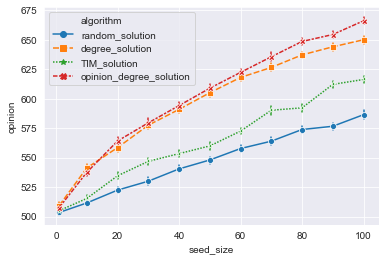

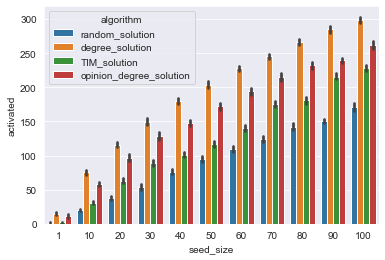

In [13]:
df = df_rand.copy()
df = df.append(df_degr)
df = df.append(df_TIM)
df = df.append(df_opd)
sns.lineplot(x="seed_size", y="opinion", markers="os*X", err_style="bars", style="algorithm", hue="algorithm", data=df)
plt.show()

sns.barplot(x="seed_size", y="activated", hue="algorithm", data=df)
plt.show()